In [1]:
import os
import pandas as pd
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32636
# path to data
example_data_path = "./data"

c:\masterplanning\env\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\skitl\AppData\Local\Temp\ipykernel_17480\4156181521.py:3: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are 

In [2]:
# load aggregated info we have
aggregated_blocks = gpd.read_parquet(os.path.join(example_data_path, "data_getter_blocks.parquet"))
accessibility_matrix = pd.read_pickle(os.path.join(example_data_path, "data_getter_matrix.pickle"))

In [3]:
# load data required for service graphs creation
schools = gpd.read_parquet(os.path.join(example_data_path, "schools.parquet"))
kindergartens = gpd.read_parquet(os.path.join(example_data_path, "kindergartens.parquet"))
recreational_areas = gpd.read_parquet(os.path.join(example_data_path, "recreational_areas.parquet")).rename_geometry('geometry')

hospitals = gpd.read_file(os.path.join(example_data_path, "hospitals.geojson"))
pharmacies = gpd.read_file(os.path.join(example_data_path, "pharmacies.geojson"))
policlinics = gpd.read_file(os.path.join(example_data_path, "policlinics.geojson"))

# services should be specified as a dictionary
services = {"kindergartens": kindergartens}

In [4]:
# services = {"schools": schools, "kindergartens": kindergartens, "recreational_areas": recreational_areas,
#             "hospitals": hospitals, "pharmacies": pharmacies, "policlinics": policlinics}

In [5]:
from masterplan_tools import CityModel

city_model = CityModel(
  blocks=aggregated_blocks, 
  accessibility_matrix=accessibility_matrix, 
  services=services
)

c:\masterplanning\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
city_model.services_graph.nodes[17]

{'population': 6026.0,
 'is_living': True,
 'id': 17,
 'is_kindergartens_service': 1,
 'kindergartens_capacity': 245,
 'provision_kindergartens': 0,
 'id_kindergartens': 0,
 'population_prov_kindergartens': 0,
 'population_unprov_kindergartens': 6026.0}

In [7]:
# city_model.visualize()

In [8]:
from masterplan_tools import ProvisionModel

services_prov = {}

for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

total load = 12709.655
total capacity = 10459
fin
 load = 2250.6550000000007
 cap = 0
0
kindergartens


In [9]:

services_prov["kindergartens"]["population_prov_kindergartens"].sum()


6044

In [10]:
services_prov["kindergartens"]['population_unprov_kindergartens'].sum()

6670

In [11]:
services_prov["kindergartens"]['small_prov_kindergartens'].sum()

4415

In [12]:
services_prov["kindergartens"][services_prov["kindergartens"]['provision_kindergartens'] > 0].head()

,geometry,landuse,block_id,is_living,current_population,floors,current_living_area,current_green_capacity,current_green_area,current_parking_capacity,current_industrial_area,area,provision_kindergartens,population_prov_kindergartens,population_unprov_kindergartens,small_prov_kindergartens,population
15,"POLYGON ((344864.533 6647854.355, 344855.596 6...",buildings,15,True,3375.0,1.0,11360.040,0.0,0.0,3004.0,3427.28270,65429.054626,57,119,86,87,3375
16,"POLYGON ((344272.022 6648285.316, 344278.598 6...",buildings,16,True,3946.0,3.5,19338.336,4095.0,1900.0,44.0,7108.81950,102276.415413,56,135,105,106,3946
17,"POLYGON ((344477.431 6648686.065, 344490.134 6...",buildings,17,True,6026.0,2.0,32985.934,71444.0,43427.0,2911.0,30788.58880,338912.554925,69,255,112,0,6026
18,"POLYGON ((344059.128 6648753.606, 344059.172 6...",buildings,18,True,4222.0,1.0,19467.875,12479.0,11708.0,128.0,8921.20723,158850.983702,52,135,122,120,4222
20,"POLYGON ((344542.320 6648943.596, 344542.403 6...",buildings,20,True,5956.0,9.0,31287.166,41360.0,7509.0,0.0,6385.50440,248549.074482,70,255,108,0,5956


In [13]:
prov1 = services_prov["kindergartens"]


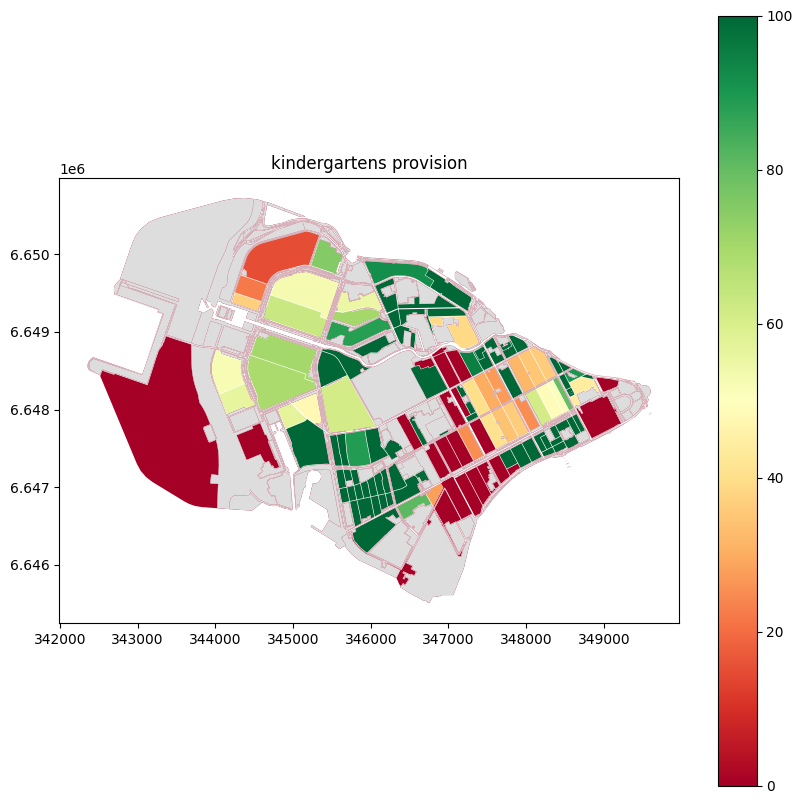

In [14]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()


In [23]:
city_model.services_graph.nodes[224]

{'population': 2556.0,
 'is_living': True,
 'id': 224,
 'is_kindergartens_service': 1,
 'provision_kindergartens': 0,
 'id_kindergartens': 0,
 'kindergartens_capacity': 280,
 'population_prov_kindergartens': 0,
 'population_unprov_kindergartens': 2556.0}

In [16]:
# updated_block = {
#  'population': 30000.0,
#  'kindergartens_capacity': 300,
#  'block_id': 224,
#  "is_kindergartens_service": 1}

In [26]:
updated_block = {'block_id': 224,
  'population': 30,
  'is_kindergartens_service': 1,
  'kindergartens_capacity': 5000}

In [27]:
graph_base = city_model.services_graph.copy()
graph = graph_base.copy()

if updated_block['block_id'] in graph.nodes:
    for attr_name, attr_value in updated_block.items():
        if attr_name != 'is_kindergartens_service' and attr_name in graph.nodes[updated_block['block_id']]:
            graph.nodes[updated_block['block_id']][attr_name] += attr_value
        elif attr_name == 'is_kindergartens_service':
            graph.nodes[updated_block['block_id']][attr_name] = attr_value

city_model.services_graph = graph

services_prov = {}
for service_type in city_model.get_service_types():
    provision = ProvisionModel(city_model=city_model, service_name=service_type)
    services_prov[service_type] = provision.run(overflow=True)
    print(service_type)

print(city_model.services_graph.nodes[30])
city_model.services_graph = graph_base

total load = 12711.485
total capacity = 15459
fin
 load = -0.5149999999994179
 cap = 2747
0
kindergartens
{'population': 17747.0, 'is_living': True, 'id': 30, 'is_kindergartens_service': 0, 'provision_kindergartens': 0, 'id_kindergartens': 0, 'kindergartens_capacity': 0, 'population_prov_kindergartens': 0, 'population_unprov_kindergartens': 17747.0}


In [28]:
services_prov["kindergartens"]["population_prov_kindergartens"].sum()

6926

In [29]:
services_prov["kindergartens"]['population_unprov_kindergartens'].sum()

5799

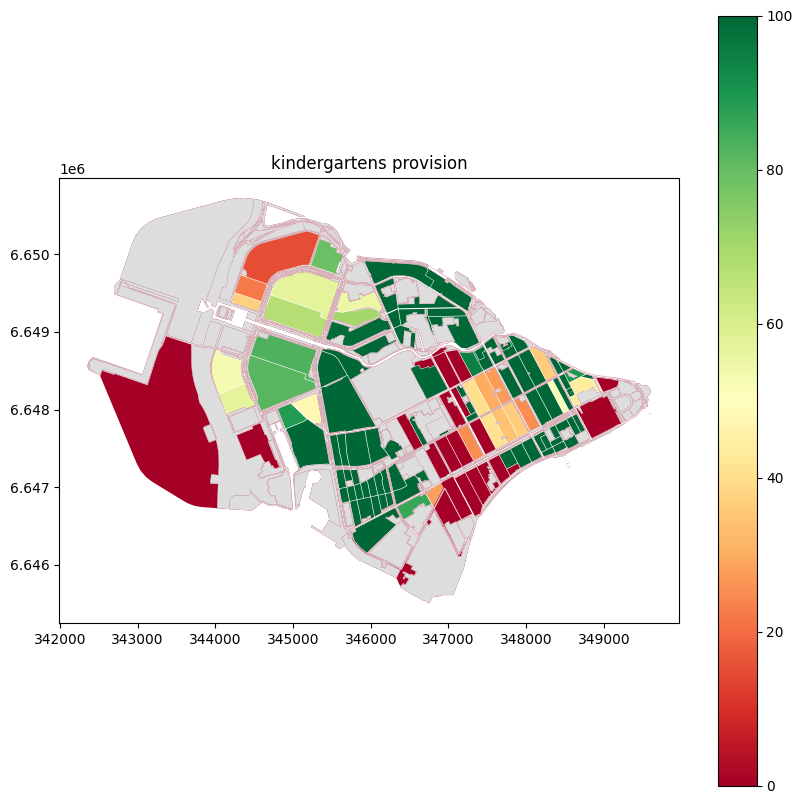

In [30]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(1, 1, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
services_prov["kindergartens"].plot(column="provision_kindergartens", legend=True, ax=ax1, cmap='RdYlGn')
ax1.set_title('kindergartens provision')
services_prov["kindergartens"][services_prov["kindergartens"]["population"] == 0].plot(ax=ax1, color="#ddd", alpha=1)

plt.show()

In [22]:
df_filtered_1 = services_prov["kindergartens"][services_prov["kindergartens"]["provision_kindergartens"] > 0]
kindergartens_all = df_filtered_1["provision_kindergartens"].sum(numeric_only=True) / len(df_filtered_1)
print(f"Total provision before {kindergartens_all}")

Total provision before 82.70476190476191
